In [1]:
import matplotlib.pyplot as plt

In [2]:
wpn_range = 95
dmg = 110

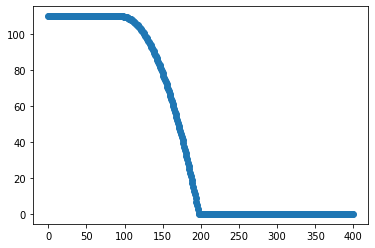

In [3]:
def new_calc_damage(distance):
    if distance <= wpn_range:
        return dmg
    else:
        return max(-(1 / wpn_range) * (distance - wpn_range) ** 2 + dmg, 0)

# def new_calc_damage(distance):
#     if distance <= self.effective_range:
#         return self.damage
#     else:
#         return max(-(1 / self.effective_range) * (distance - self.effective_range) ** 2 + self.damage, 0)
dmgs = []
for i in range(400):
    dmgs.append(new_calc_damage(i))

plt.scatter(range(400), dmgs)

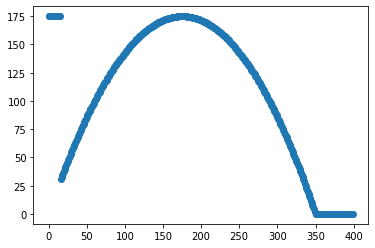

In [100]:
def old_calc_damage(distance):
    if distance <= wpn_range:
        return dmg
    else:
        return max(-(1 / dmg) * (distance - dmg) ** 2 + dmg, 0)

# def old_calc_damage(distance):
#     if distance <= self.effective_range:
#         return self.damage
#     else:
#         return max(-(1 / self.damage) * (distance - self.damage) ** 2 + self.damage, 0)
old_dmgs = []
for i in range(400):
    old_dmgs.append(old_calc_damage(i))
plt.scatter(range(400), old_dmgs)

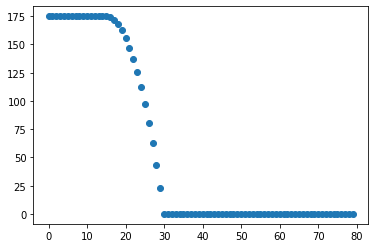

In [5]:
wpn_range = 15
dmg = 175
plot_range = wpn_range*2 + 50

def newest_calc_damage(distance):
    if distance <= wpn_range:
        return dmg
    else:
        return max(((-dmg/(wpn_range**2))*(distance**2) +
                 2*dmg/wpn_range*distance), 0)

newest_dmgs = []
for i in range(plot_range):
    newest_dmgs.append(newest_calc_damage(i))
plt.scatter(range(plot_range), newest_dmgs)

In [39]:
from environment.weapons import Weapon

winfield_stats=("Winfield M1873 Talon", 110, 95, 150, 16, 20)
romero_stats=("Romero", 200, 15, 54, 1, 12)
pax_stats=("Caldwell Pax", 110, 86, 31, 6, 12)
lebel_stats=("Lebel 1886", 132, 250, 54, 10, 5)
sparks_stats=("Sparks LRR", 149, 344, 54, 1, 16)
specter_stats=("Specter 1882 Bayonet", 175, 10, 168, 5, 10)

winfield = Weapon(*winfield_stats)
romero = Weapon(*romero_stats)
pax = Weapon(*pax_stats)
lebel = Weapon(*lebel_stats)
sparks = Weapon(*sparks_stats)
specter = Weapon(*specter_stats)

weapons = [((0,0), winfield), ((0,1), romero), ((0,2), pax), ((1,0), lebel), ((1,1), sparks), ((1,2), specter)]

damage_modifiers = {"leg": 0.3, "arm": 0.7, "torso": 1, "head": 2}

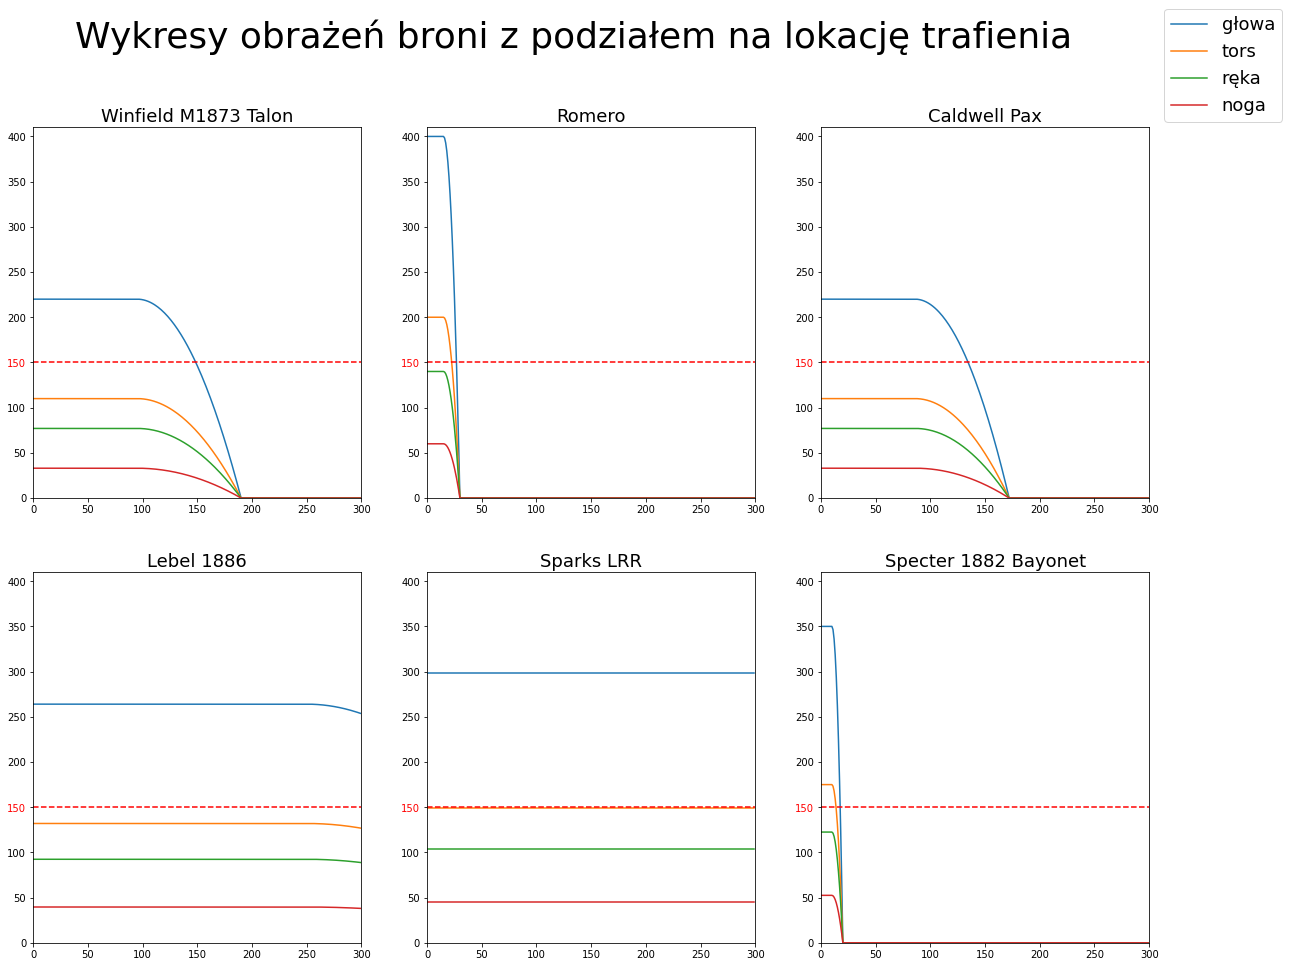

In [104]:
figure, axis = plt.subplots(2, 3, figsize=(20, 15))
figure.suptitle("Wykresy obrażeń broni z podziałem na lokację trafienia", fontsize = 36)

for wep_loc, weapon in weapons:
    weapon.ammo_loaded = 10_000
    leg_dmg = []
    arm_dmg = []
    torso_dmg = [] 
    head_dmg = []
    plot_range = 300
    for i in range(plot_range):
        raw_dmg = weapon.deal_damage(i)

        leg_dmg.append(raw_dmg*0.3)
        arm_dmg.append(raw_dmg*0.7)
        torso_dmg.append(raw_dmg)
        head_dmg.append(raw_dmg*2)

    axis[wep_loc].set_xlim([0, 300])
    axis[wep_loc].set_ylim([0, 410])
    axis[wep_loc].get_yticklabels()[3].set_color("red")
    axis[wep_loc].plot(range(plot_range), head_dmg)
    axis[wep_loc].plot(range(plot_range), torso_dmg)
    axis[wep_loc].plot(range(plot_range), arm_dmg)
    axis[wep_loc].plot(range(plot_range), leg_dmg)
    axis[wep_loc].plot([0, 300], [150, 150], linestyle="--", color="red")
    # axis[wep_loc].legend(["leg", "arm", "torso", "head"])
    axis[wep_loc].set_title(weapon.name, fontsize=18)
handles, _ = plt.gca().get_legend_handles_labels()
figure.legend(["głowa", "tors", "ręka", "noga"], prop={'size': 18})